
Customers Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Missing Values:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Basic Statistics:
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

Products Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns

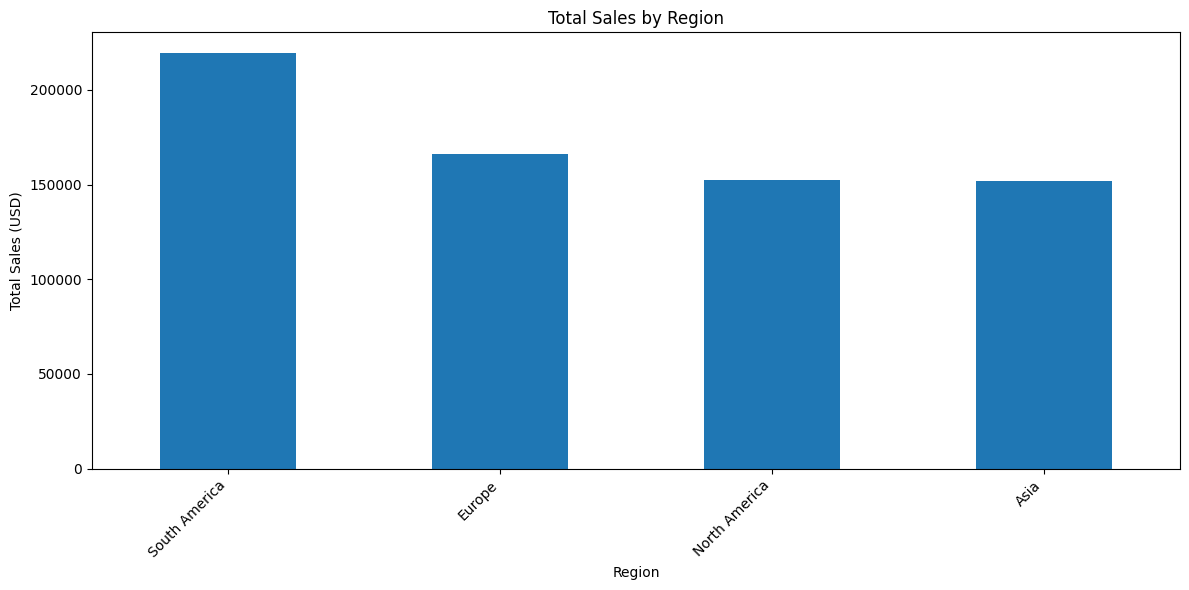

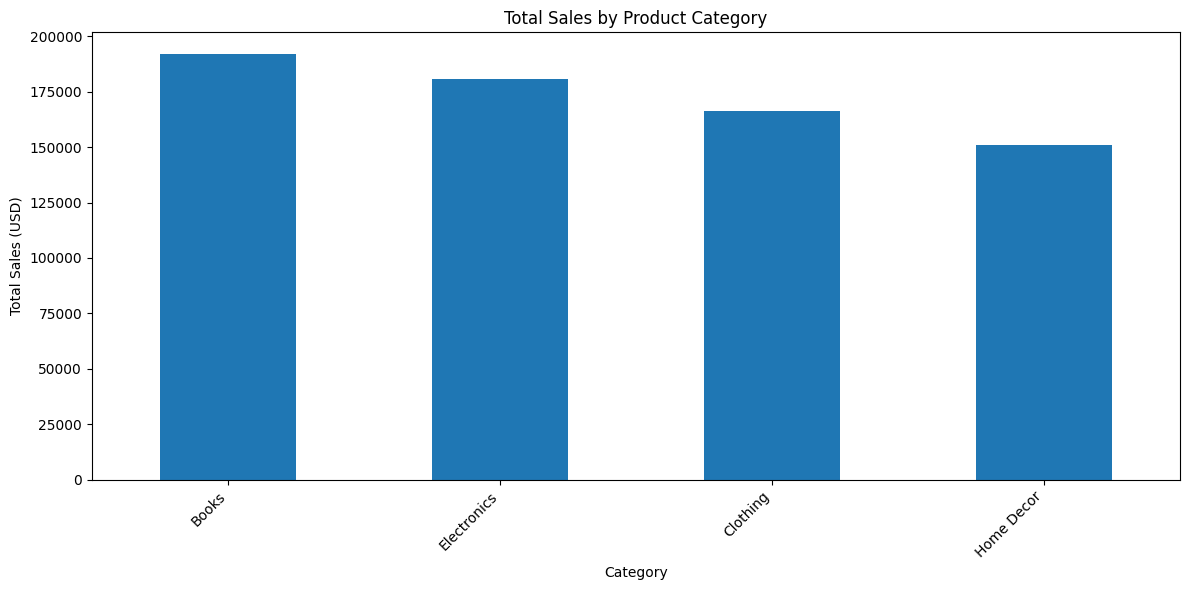

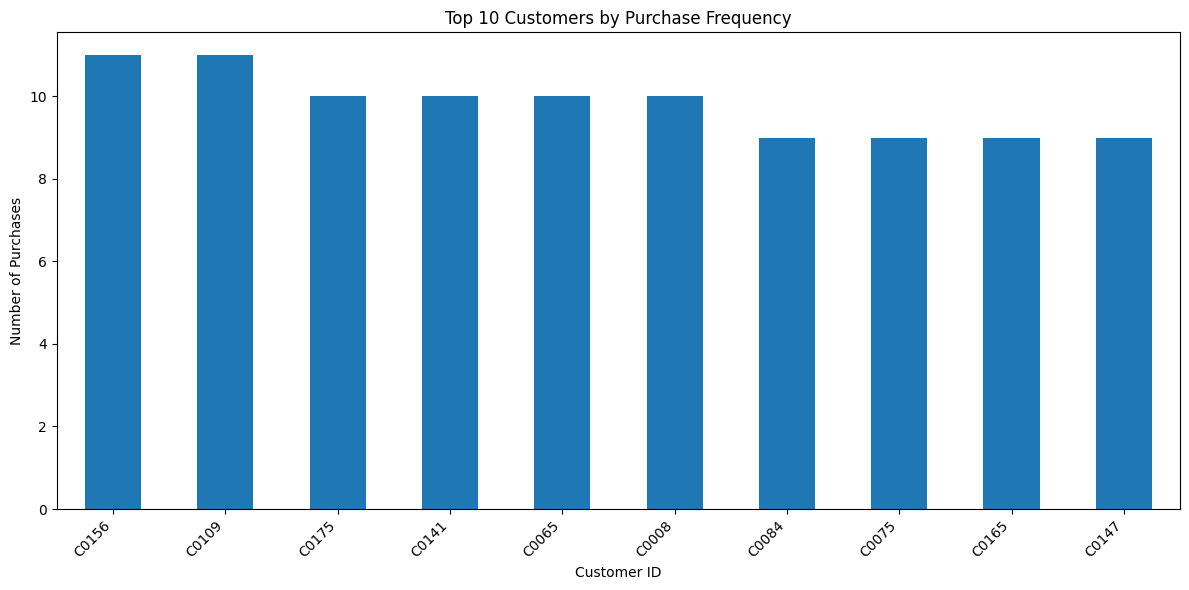

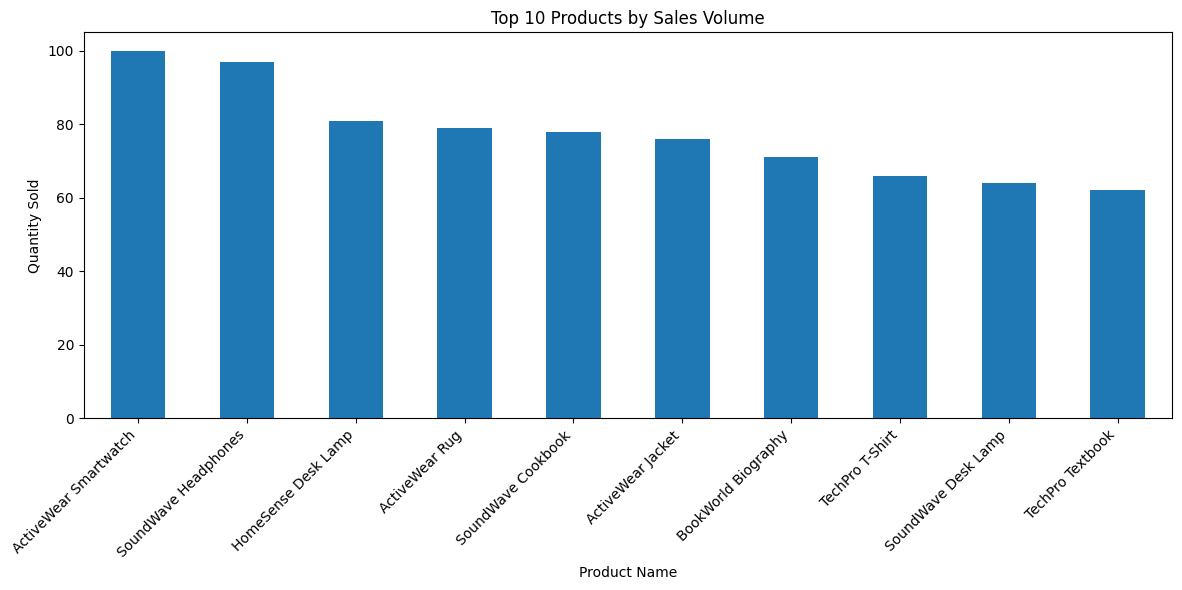

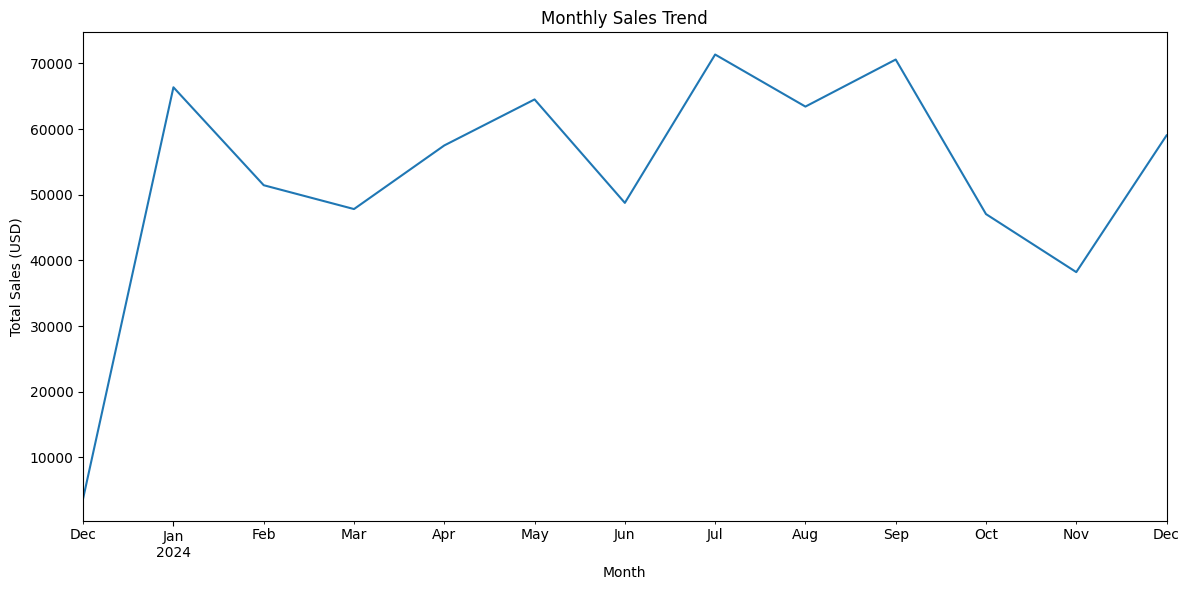

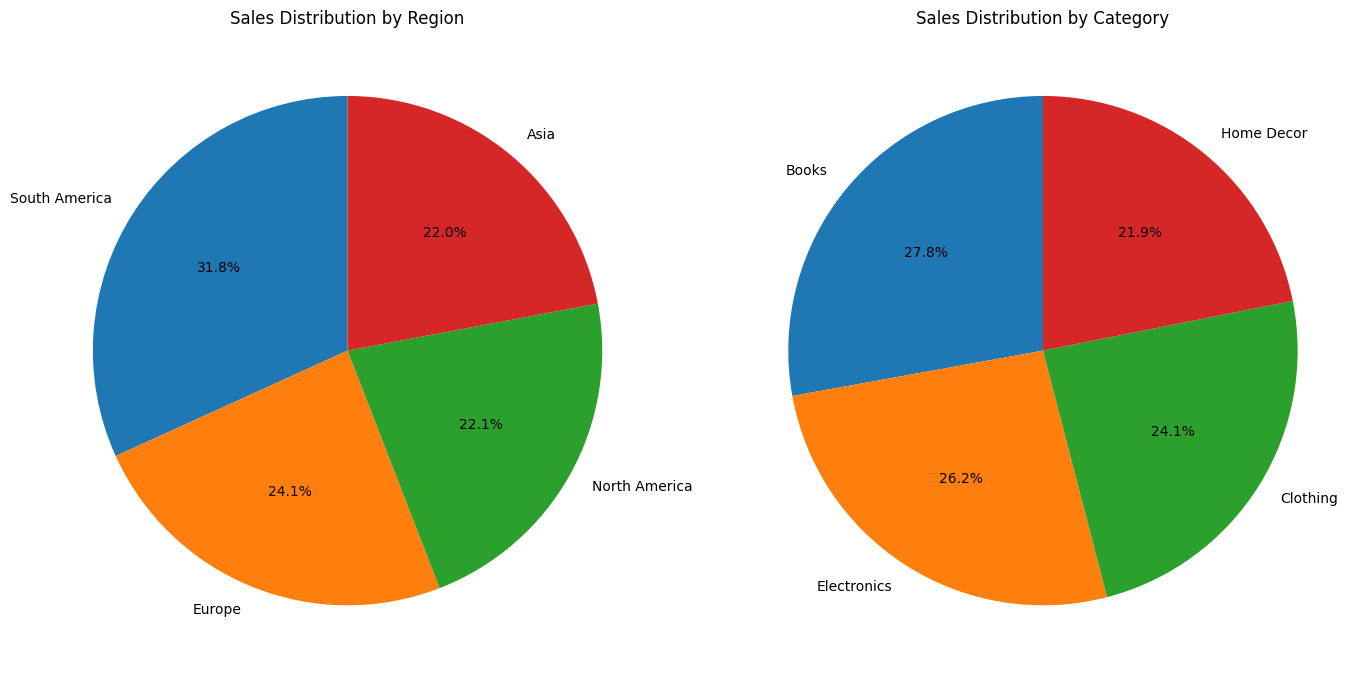

EDA and Insights Generation Complete!


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')


def explore_dataset(df, name):
    print(f"\n{name} Dataset Information:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nBasic Statistics:")
    print(df.describe())

explore_dataset(customers, 'Customers')
explore_dataset(products, 'Products')
explore_dataset(transactions, 'Transactions')


merged_data = transactions.merge(customers, on='CustomerID')
merged_data = merged_data.merge(products, on='ProductID')


total_sales = merged_data['TotalValue'].sum()
sales_by_region = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
sales_by_category = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)


customer_purchase_count = merged_data.groupby('CustomerID').size().sort_values(ascending=False)
top_customers = customer_purchase_count.head(10)


product_sales_volume = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False)
top_products = product_sales_volume.head(10)


merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
monthly_sales = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()


def plot_top_sales(data, title, xlabel, ylabel):
    plt.figure(figsize=(12, 6))
    data.plot(kind='bar')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


plot_top_sales(sales_by_region, 'Total Sales by Region', 'Region', 'Total Sales (USD)')
plot_top_sales(sales_by_category, 'Total Sales by Product Category', 'Category', 'Total Sales (USD)')
plot_top_sales(top_customers, 'Top 10 Customers by Purchase Frequency', 'Customer ID', 'Number of Purchases')
plot_top_sales(top_products, 'Top 10 Products by Sales Volume', 'Product Name', 'Quantity Sold')


plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.tight_layout()
plt.show()


fig, axs = plt.subplots(1, 2, figsize=(14, 7))


axs[0].pie(sales_by_region, labels=sales_by_region.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Sales Distribution by Region')


axs[1].pie(sales_by_category, labels=sales_by_category.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Sales Distribution by Category')


plt.tight_layout()
plt.show()


insights = f"""
Business Insights:

1. Total Sales Overview:
   - Total Sales: ${total_sales:,.2f}
   - Top Performing Region: {sales_by_region.index[0]} with ${sales_by_region.iloc[0]:,.2f}
   - Top Product Category: {sales_by_category.index[0]} with ${sales_by_category.iloc[0]:,.2f}

2. Customer Purchase Behavior:
   - Top Customer (ID: {top_customers.index[0]}) made {top_customers.iloc[0]} purchases
   - Customer purchase frequency varies significantly across the dataset

3. Product Performance:
   - Best Selling Product: {product_sales_volume.index[0]} with {product_sales_volume.iloc[0]} units sold
   - Diverse product performance across different categories

4. Temporal Sales Patterns:
   - Monthly sales show fluctuations in revenue
   - Peak sales month: {monthly_sales.idxmax()} with ${monthly_sales.max():,.2f}

5. Market Segmentation:
   - Multiple regions and product categories contribute to overall sales
   - Opportunities for targeted marketing and customer segmentation
"""

with open('Poornima M_Nerale_EDA.txt', 'w') as f:
    f.write(insights)

print("EDA and Insights Generation Complete!")
